This is a jupyter notebook about the implementaion of Latent Dirichlet Allocation(LDA), which works best on datasets that come in form of text documents. It can also derive topics from the dataset. LDA does something similar to NMF where the input matrix X (document-term) gets decomposed into two matrices W (topic-term) and H (document-topic). 

Here are the necessary imports that need to be made:

In [119]:
# License: BSD 3 clause
from time import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

Then we have the amounts of samples, features, components and top words for LDA:

In [120]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20

Next we have the function which plots the top words

In [121]:


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30,15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
    
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()



Now we need to load the dataset and vectorize it. We vectorize it so as to get rid of headers, footers, quotes in the data. Also what is done is that the data needs to have a normal distribution, i.e. data that is words that are in the least 95% are removed.

In [122]:
print("Loading dataset...")
t0=time()
data, _ = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)
print(type(data))
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

#Feature extration
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2,
    max_features=n_features,
    stop_words="english"
)
t0=time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." %(time()-t0))
print()


Loading dataset...
<class 'list'>
done in 0.873s.
Extracting tf features for LDA...
done in 0.234s.



Now fitting begins for LDA in terms of the n_samples and n_features that are provided:



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 2.176s


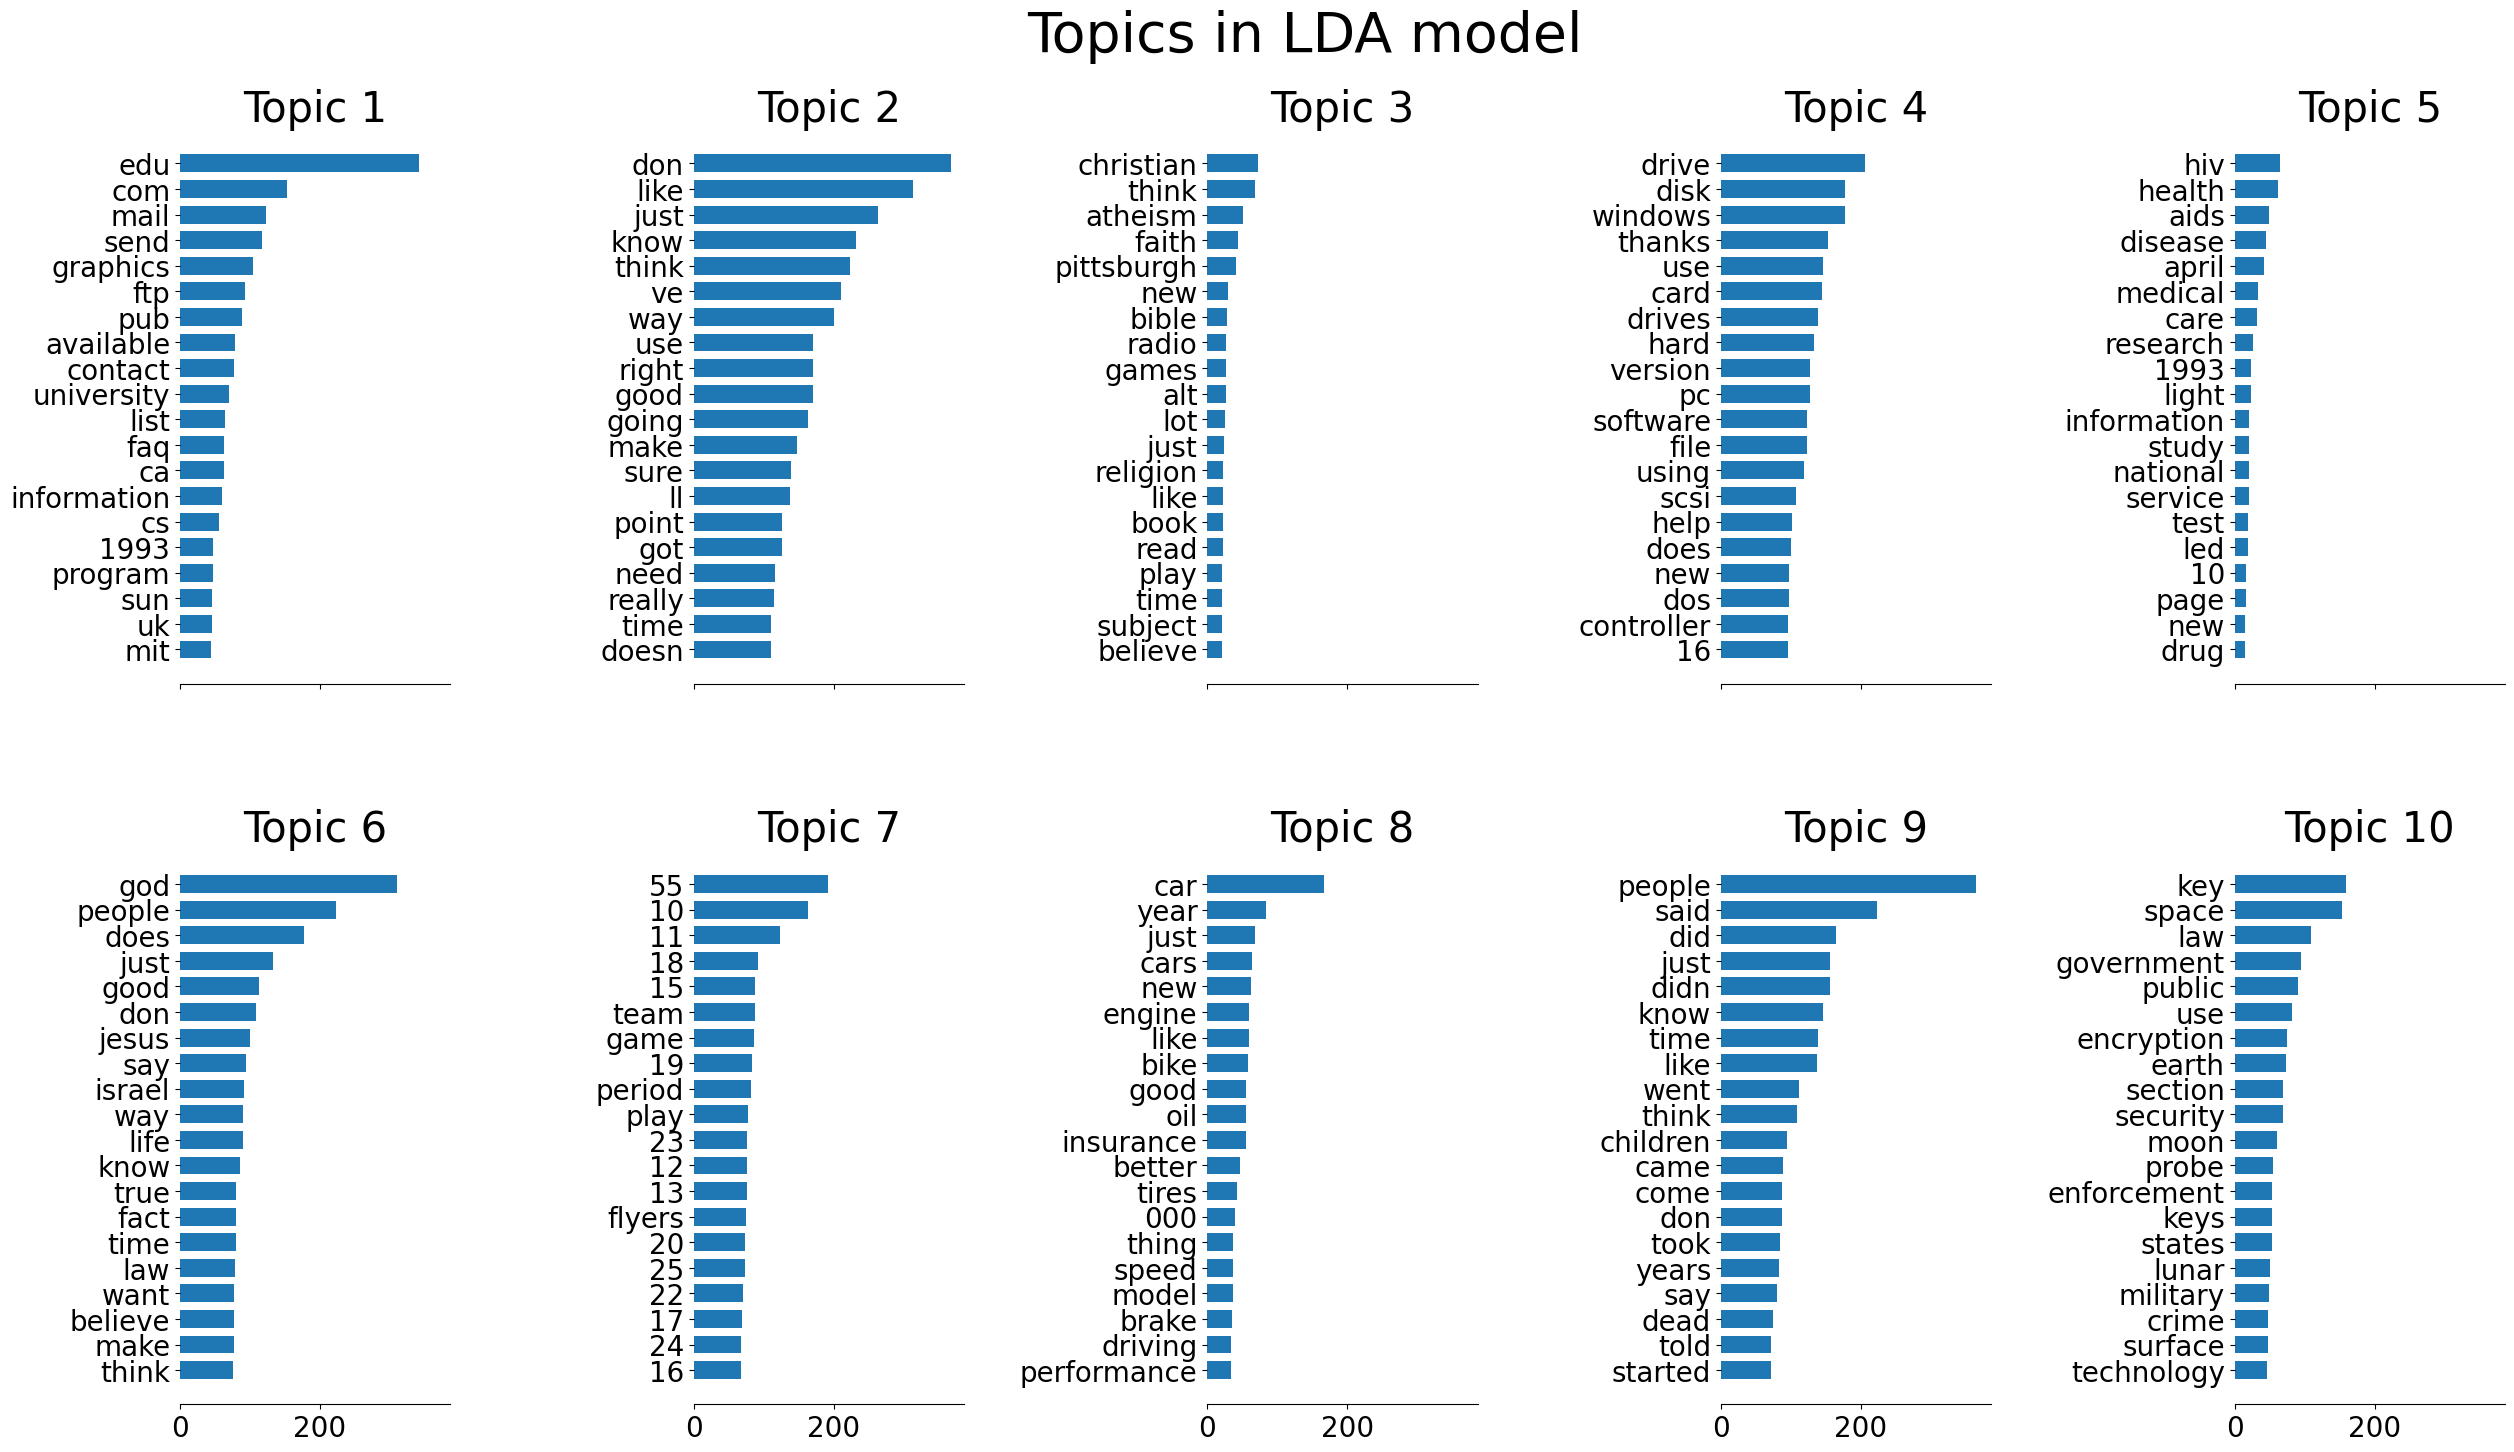

In [123]:
print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..." % (n_samples, n_features),
)

lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs" % (time()-t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")


We can try to work on another dataset this time. I have choosen the WikiQA dataset which can be found in the folder. It contains questions and answers to different questions. I use pandas to read the file and make a DataFrame. I delete the questions column and write it to "newdatas.txt" file.

In [124]:

import pandas as panda
import re
import string

string_path = "WikiQA-dev.txt"

data = panda.read_csv(string_path,sep='\t', lineterminator='\n')
data.head
data = data.iloc[: , 1 :]

data.to_csv("newdatas.txt", sep='\t', encoding='utf-8')


I open the new file and put the text in wiki_text. I use re.sub() method so as to get rid of numbers. I use lower so as to only use small letters. I use translate method so as to get rid of punctuation marks.

In [125]:
wiki_file = open("newdatas.txt", "rt")
wiki_text = wiki_file.read()
wiki_file.close()
order = r'[0 - 9]'
wiki_text = re.sub(order, ' ', (((wiki_text.lower())).translate(str.maketrans('','', string.punctuation)))).split()


Otherwise I follow the same procedure, I vectorize the data, and let LDA fit the new vectorized data

In [126]:
new_data_samples = wiki_text[:n_samples]
print("done in %0.3fs." % (time() - t0))

#Feature extration
print("Extracting tf features for LDA...")
new_tf_vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2,
    max_features=n_features,
    stop_words="english"
)
t0=time()
new_tf = new_tf_vectorizer.fit_transform(new_data_samples)
print("done in %0.3fs." %(time()-t0))
print()


done in 3.878s.
Extracting tf features for LDA...
done in 0.009s.





 LDA models with tf features, n_samples=2000 and n_features=1000...
done in 0.417s


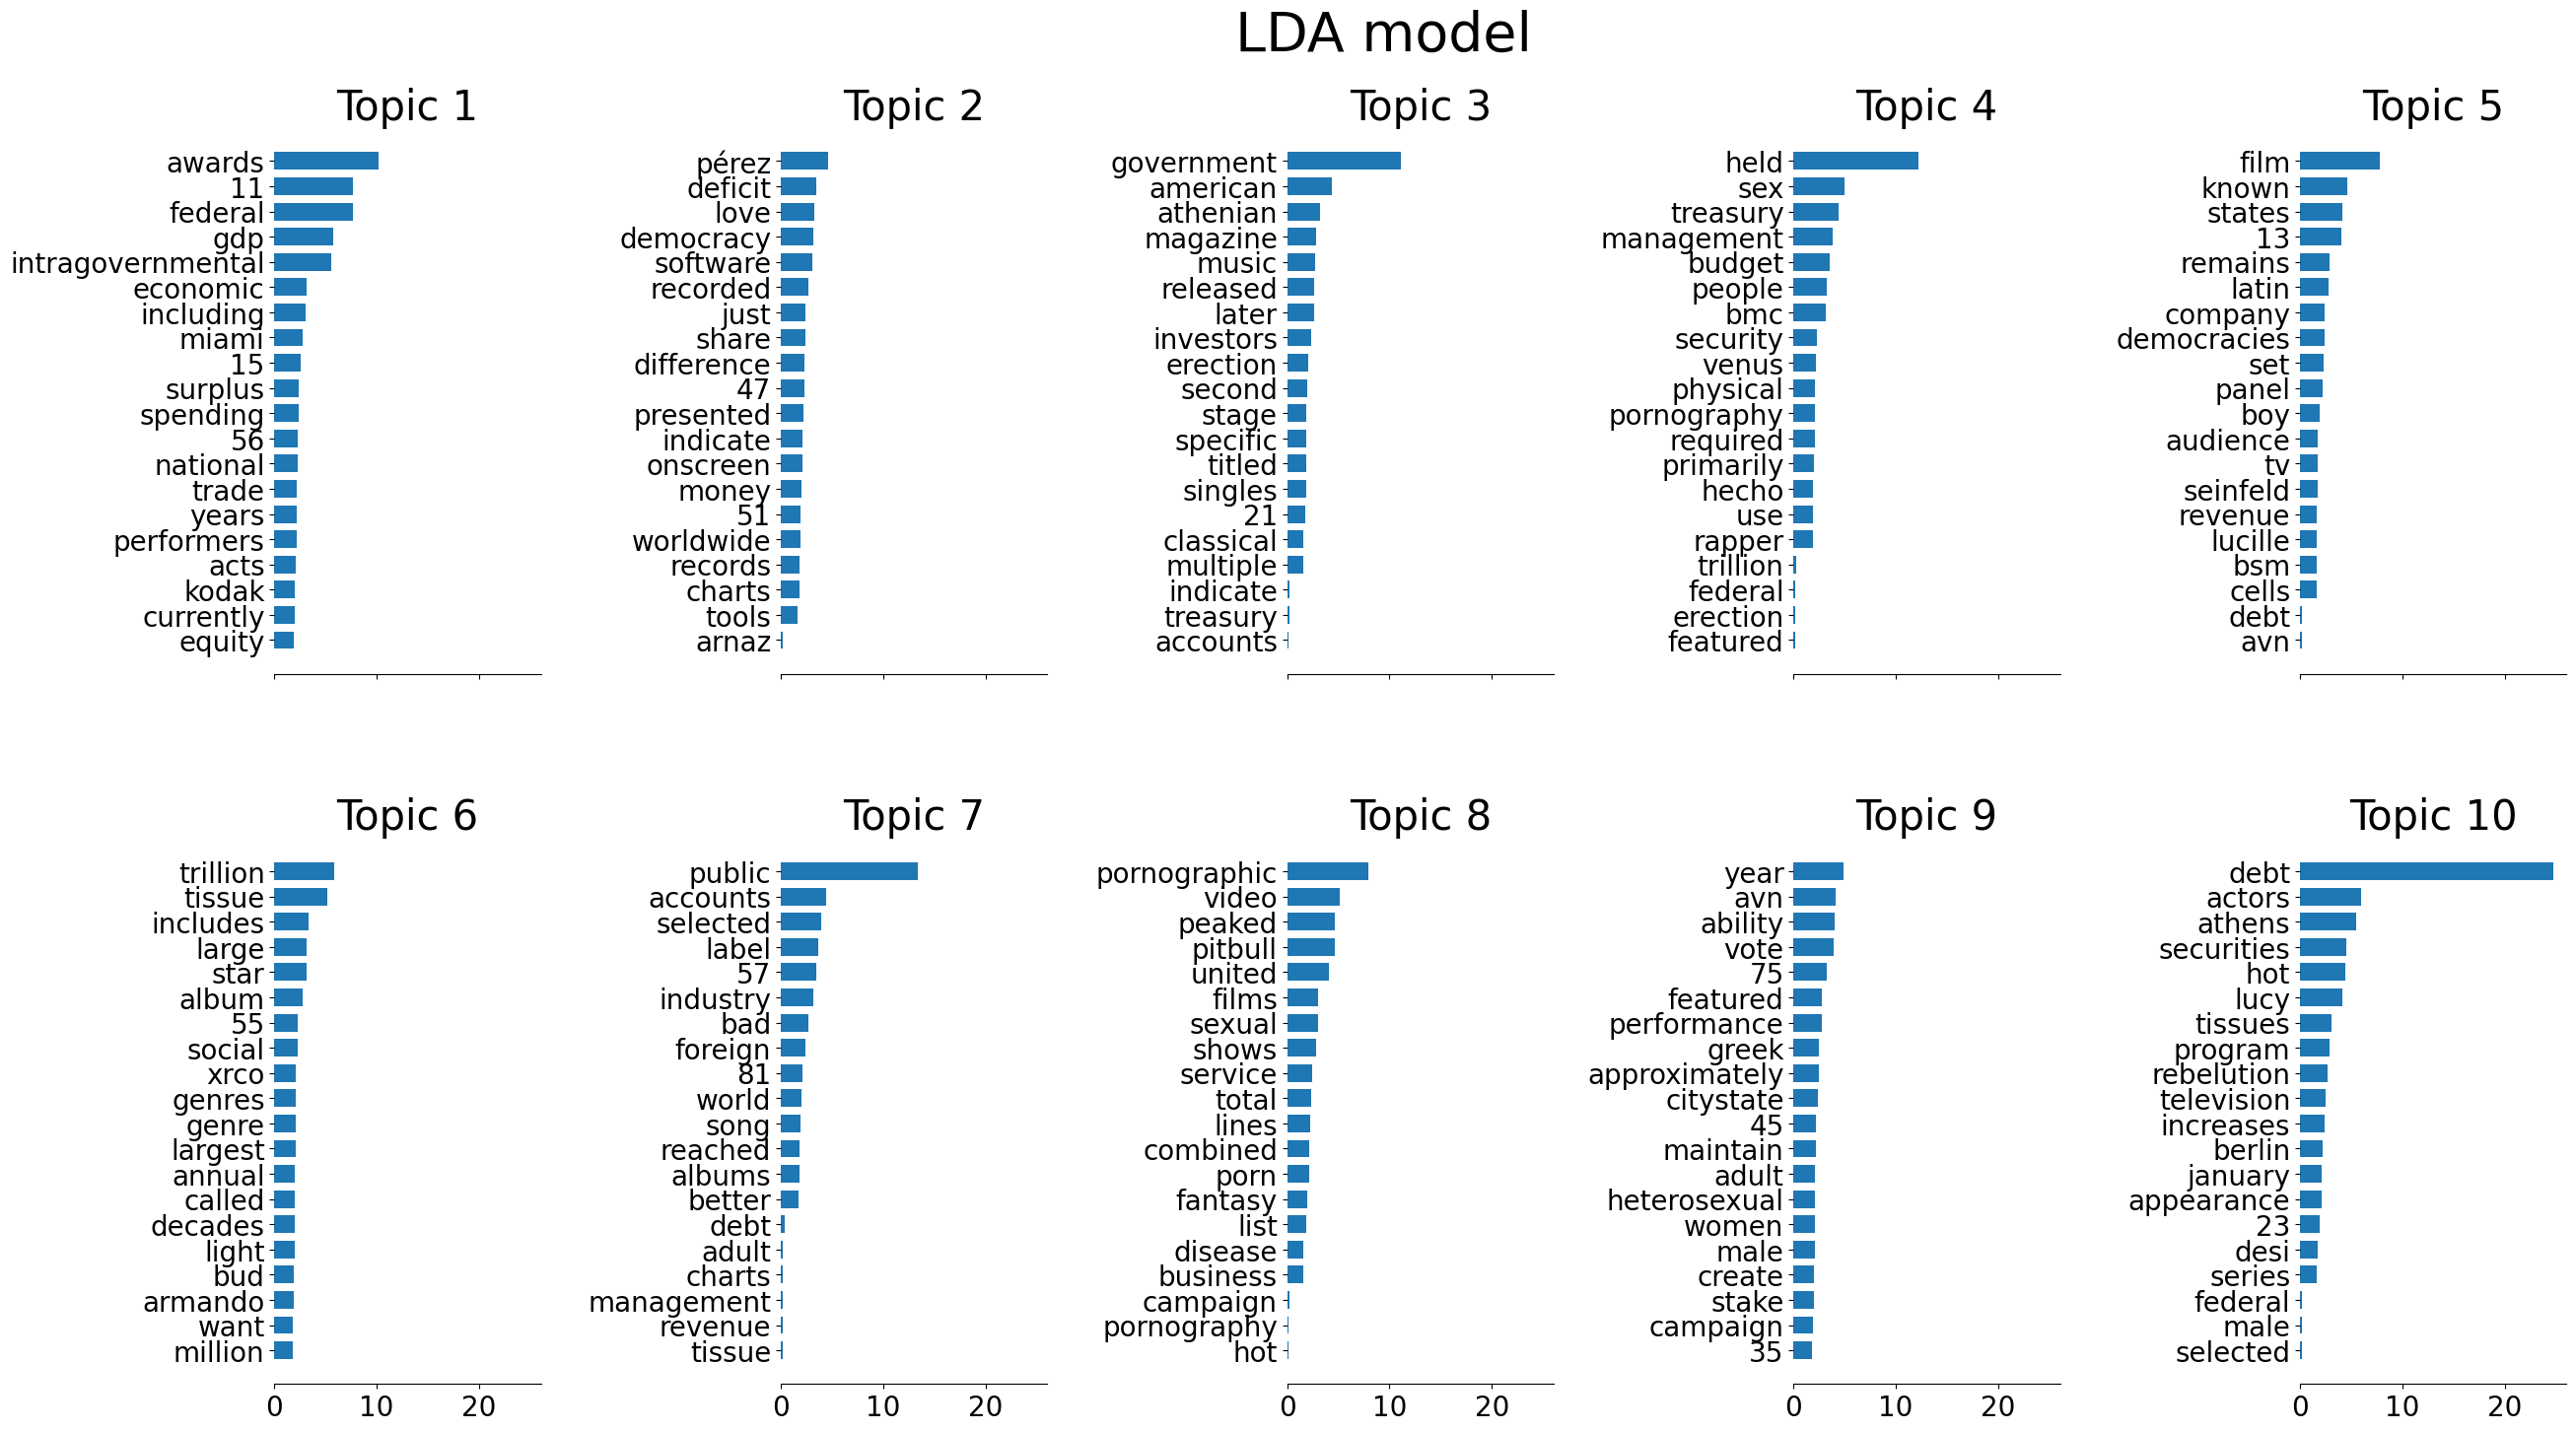

In [127]:
print(
    "\n" * 2,
    "LDA models with tf features, n_samples=%d and n_features=%d..." % (n_samples, n_features),
)

lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(new_tf)
print("done in %0.3fs" % (time()-t0))

new_tf_feature_names = new_tf_vectorizer.get_feature_names_out()
plot_top_words(lda, new_tf_feature_names, n_top_words, "LDA model")
